# 分帧
- Assumption : 短时平稳性
- 短时帧作为处理单位，参数
    - 帧长
    - 帧移
- 短时帧是交叠的
- 加窗导致频谱泄漏
# 时域特征
- 短时平均能量 ： 短时是指短时帧内，浊音能量显著大
- 短时过零率 ： 粗略估计频率，浊音低，清音频率高
# 频域特征
- 声谱图，按短时帧分别做FFT，颜色越深，对应频率的幅值大  
    共振峰formants，是频谱图上的峰值处，所以声谱图上颜色深
    谱包络，连接共振峰的光滑曲线，所以还包含共振峰的转变
- 短时频域能量，静音帧，语音的频域能量变化大，因为静音多
- 子带能量比 ： 非均匀划分频带，不同类型的音频，子带能量分布不同
- 频率特征系数 ： 先把音频信号构造出具有不同频率和幅度的谐波，然后对谐波进行特征系数提取
    - LPCC 线性预测倒谱
    - MFCC mel频率倒谱系数  
    人耳的耳蜗是滤波器组，对不同频率的灵敏度不同（1kHz分界，线性+对数）
    





In [1]:
import wave
import pylab as pl
import numpy as np

In [2]:
file = r'data\1.wav'
f = wave.open(file, 'rb')
params = f.getparams()

In [3]:
params

_wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=1620480, comptype='NONE', compname='not compressed')

In [4]:
frames = f.readframes(params.nframes)

In [5]:
f.close()

In [6]:
type(frames)

bytes

In [7]:
wave_data = np.fromstring(frames, dtype=np.short)

In [8]:
wave_data = np.reshape(wave_data,newshape=(-1,2))
wave_data = np.transpose(wave_data)
wave_data.shape

(2, 1620480)

In [9]:
time = np.arange(params.nframes)*(1./params.framerate)

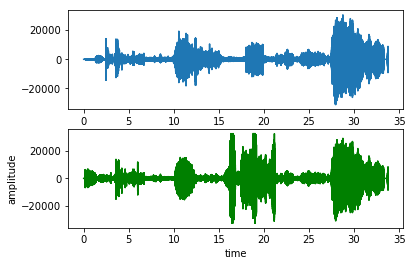

In [10]:
pl.subplot(211)
pl.plot(time, wave_data[0])
pl.subplot(212)
pl.plot(time, wave_data[1], c='g')
pl.xlabel('time')
pl.ylabel('amplitude')
pl.show()

### LibRosa

In [11]:
import librosa
# file = librosa.util.example_audio_file()

In [12]:
y,sr = librosa.load(file)

In [13]:
y.shape

(744408,)

In [14]:
sr

22050

每分钟击打次数

In [15]:
tempo,beat_frames = librosa.beat.beat_track(y=y,sr=sr)
tempo

112.34714673913044

In [16]:
beats_time = librosa.frames_to_time(beat_frames)
beats_time.shape

(62,)

In [17]:
y_beats = librosa.clicks(times=beats_time, sr=sr)
y_beats

array([ 0.        ,  0.        ,  0.        , ..., -0.00074144,
       -0.00052856, -0.00027452], dtype=float32)

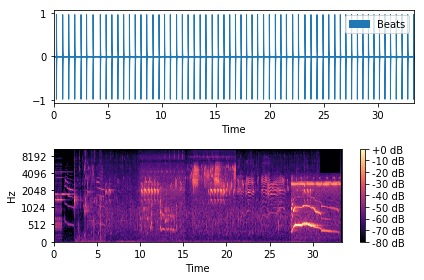

In [18]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
plt.figure()
s = librosa.feature.melspectrogram(y=y,sr=sr)
ax = plt.subplot(212)
librosa.display.specshow(librosa.power_to_db(s,ref=np.max),x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.subplot(211,sharex=ax)
librosa.display.waveplot(y_beats, sr=sr, label='Beats')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
hop_length = 512
y_h, y_p = librosa.effects.hpss(y)
p_tempo, p_beat_frames = librosa.beat.beat_track(y=y_p, sr=sr)
p_beat_frames.shape

(63,)

In [20]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
mfcc_delta = librosa.feature.delta(mfcc)
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), p_beat_frames)
beat_mfcc_delta.shape

(26, 64)

In [23]:
chromagram = librosa.feature.chroma_cqt(y=y_h,sr=sr)
beat_chroma = librosa.util.sync(chromagram,
                               p_beat_frames,
                               aggregate=np.median)
print(beat_chroma.shape)
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

(12, 64)


In [31]:
chromagram.shape

(12, 1454)

In [24]:
librosa.display.ChromaFormatter?